In [1]:
import pandas as pd

In [2]:
a=pd.read_csv(r"F:\\study\\data science\\pandas_dataset\\amazonreviews.tsv",sep='\t')

In [3]:
a.head(10)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
5,pos,an absolute masterpiece: I am quite sure any o...
6,neg,"Buyer beware: This is a self-published book, a..."
7,pos,Glorious story: I loved Whisper of the wicked ...
8,pos,A FIVE STAR BOOK: I just finished reading Whis...
9,pos,Whispers of the Wicked Saints: This was a easy...


In [4]:
a.shape

(10000, 2)

In [5]:
a.label.replace({"pos":1,"neg":0},inplace=True)# consider label as target variable

In [6]:
a.review=a.review.str.lower()

In [7]:
import nltk

In [8]:
from nltk.corpus import stopwords

In [9]:
import string

In [74]:
def text_process(mess):
        """
        1.remove the punctuation
        2.remove the stopwords
        3.returnthe list of clean textwords
        """
        nopunc=[char for char in mess if char not in string.punctuation]
        nopunc="".join(nopunc)
        return[ word for word in nopunc.split() if word not in stopwords.words("english")]

In [75]:
a["review"].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

In [78]:
from wordcloud import WordCloud

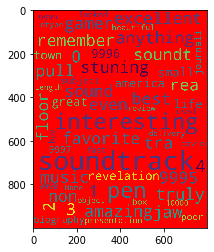

In [79]:
import matplotlib.pyplot as plt
cloud=WordCloud(background_color='red',width=800,height=1000,include_numbers=True).generate(str(a['review']))# differ or change but no of woerds ares same font=count
# font size will be acc to count,# by default it consider stopwords and if we want to ignore them then we need to pass as hyterparameter stopwords
plt.imshow(cloud)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer# to build TDM

In [26]:
bow_tranformer=CountVectorizer(analyzer=text_process).fit(a["review"])

In [27]:
bow_tranformer.vocabulary_# count of each word for how many times.

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [28]:
len(bow_tranformer.vocabulary_)# TDM has these many columns

40040

In [29]:
messages_bow=bow_tranformer.transform(a.review)

In [30]:
#sampling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(messages_bow,a.label,test_size=.2)

In [31]:
#naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
NB=MultinomialNB()

In [53]:
NB.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
pred_test_y=NB.predict(x_test)
pred_test_y

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_test_y,y_test)

array([[880, 167],
       [150, 803]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test_y)

0.8415

In [ ]:
#Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
pred_y=rf.predict(x_test)
pred_y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,y_test)

array([[860, 144],
       [170, 826]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)

0.843

In [42]:
#Decision tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
pred_y=dt.predict(x_test)
pred_y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,y_test)    

array([[735, 233],
       [295, 737]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)

0.736

In [47]:
#Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
pred_y=logmodel.predict(x_test)
pred_y

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,y_test)    

array([[866, 145],
       [164, 825]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)

0.8455

In [10]:
#inbuilt sentimental analysis
import nltk

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
nltk.download("vader_lexicon")# inbuilt library of nltk

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [7]:
sent=SentimentIntensityAnalyzer()

In [25]:
sent.polarity_scores("this scotch was awesome.I had a heavenly feeling by taking a sip")# instead  of  printing store in varibales and then access

{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.6705}

In [21]:
abc=sent.polarity_scores("this scotch was awesome.I had a heavenly feeling by taking a sip")# instead  of  printing store in varibales and then access
# overall sentiment is positive as value of compound is positive

In [22]:
abc['compound']

0.6705

In [23]:
abc['neg']

0.0

In [24]:
abc['pos']

0.407

In [ ]:
# cop=overall sentiment
#-1 to +1

In [9]:
str1="it was s horrible flight,filled of turbulence"

In [10]:
sent.polarity_scores(str1)# negative as overall value of sts is negative

{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.5423}

In [13]:
str2="product of very beautiful but not of any use"# sychastic comment


In [14]:
sent.polarity_scores(str2)# overall sentinemt is positive

{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.3811}

In [15]:
str3="product of very beautiful but it is of useless"


In [16]:
sent.polarity_scores(str3)# overall sentinment is negative

{'neg': 0.278, 'neu': 0.526, 'pos': 0.195, 'compound': -0.274}

In [1]:
# comentsall not siach
import pandas as pd

In [2]:
amazon=pd.read_csv(r"F:\\study\\data science\\pandas_dataset\\amazonreviews.tsv",sep='\t')

In [3]:
amazon.iloc[0][1]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [4]:
score_com=[]
score_pos=[]
score_neg=[]


In [8]:
for i in range(0,amazon.shape[0]):
    score=sent.polarity_scores(amazon.iloc[i][1])
    score1=score['compound']
    score_com.append(score1)
    score2=score['pos']
    score_pos.append(score2)
    # below two lines fetch neg
    score3=score['neg']
    score_neg.append(score3)

In [9]:
amazon['Comp-Score']=score_com
amazon['Pos-Score']=score_pos
amazon['Neg-Score']=score_neg


In [10]:
amazon

,label,review,Comp-Score,Pos-Score,Neg-Score
0,pos,Stuning even for the non-gamer: This sound tra...,0.9454,0.243,0.088
1,pos,The best soundtrack ever to anything.: I'm rea...,0.8957,0.145,0.018
2,pos,Amazing!: This soundtrack is my favorite music...,0.9858,0.268,0.040
3,pos,Excellent Soundtrack: I truly like this soundt...,0.9814,0.295,0.090
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.9781,0.254,0.000
...,...,...,...,...,...
9995,pos,A revelation of life in small town America in ...,0.9610,0.136,0.017
9996,pos,Great biography of a very interesting journali...,0.9544,0.132,0.000
9997,neg,Interesting Subject; Poor Presentation: You'd ...,0.7074,0.137,0.096
9998,neg,Don't buy: The box looked used and it is obvio...,-0.3595,0.000,0.091


In [11]:
amazon.describe()#

,Comp-Score,Pos-Score,Neg-Score
count,10000.000000,10000.000000,10000.000000
mean,0.336444,0.151272,0.076174
std,0.674584,0.101934,0.073154
min,-0.994500,0.000000,0.000000
25%,-0.296000,0.079000,0.017000
50%,0.669600,0.135000,0.062000
75%,0.913600,0.207000,0.114000
max,0.998700,0.634000,0.611000


In [ ]:
#amazon["Comp-Score"]<0)
#df1=where com>0
#df2=where com>0

In [12]:
len(amazon["Comp-Score"]>0)# 6800pos and 2000 neg

10000

In [14]:
df1=amazon[amazon["Comp-Score"]>0]

In [16]:
df1.shape# means positive sentiment

(6801, 5)

In [18]:
df2=amazon[amazon["Comp-Score"]<0]

In [19]:
df2.shape# neagative sentinemt

(3058, 5)